<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210305_ANNs_vs_AutoEncoder_Credit_Card_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DataSet/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2. Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

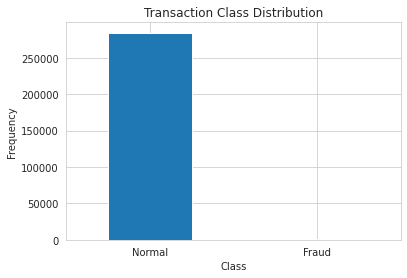

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [ ]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


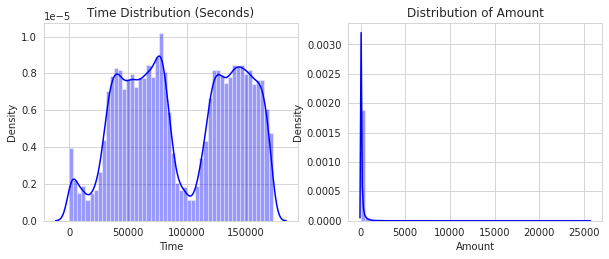

In [ ]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

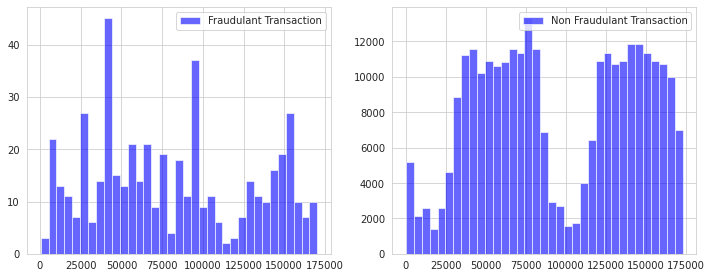

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

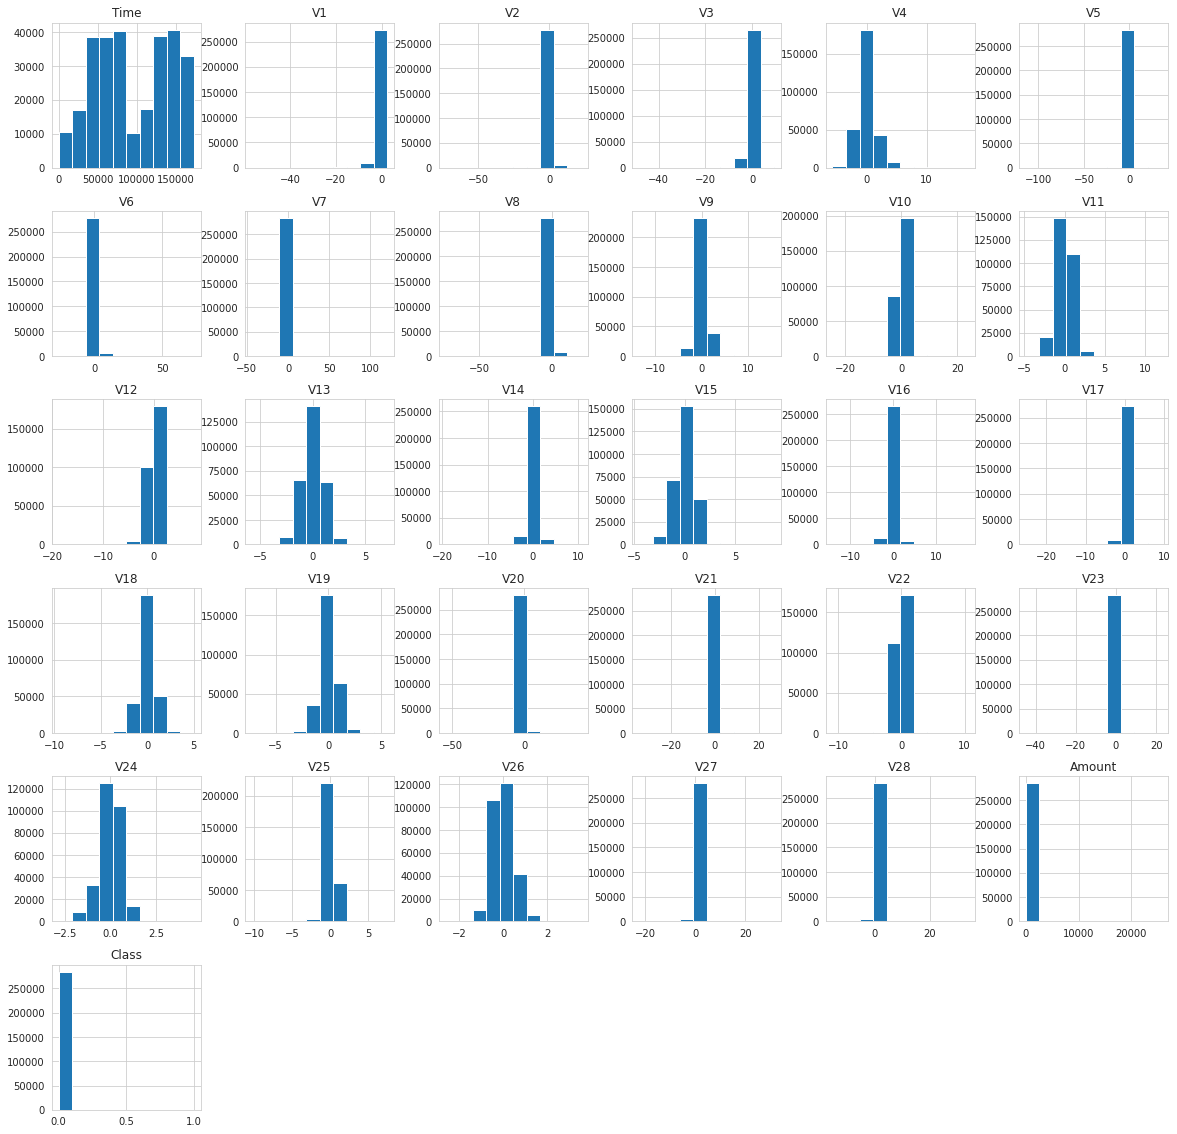

In [ ]:
data.hist(figsize=(20, 20));

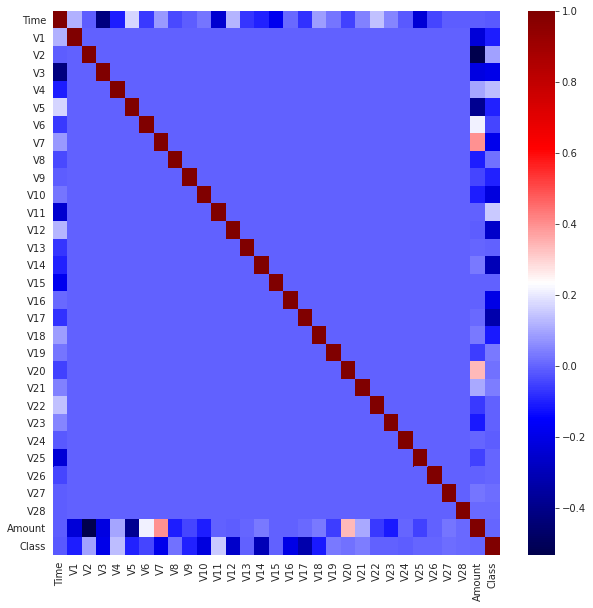

In [ ]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

Model Building

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [ ]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=100, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
78/78 [==============================] - 13s 128ms/step - loss: 0.6491 - fn: 36.3038 - fp: 21288.3165 - tn: 60449.4810 - tp: 113.5696 - precision: 0.0048 - recall: 0.7450 - val_loss: 0.1722 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 2/100
78/78 [==============================] - 9s 111ms/step - loss: 0.1461 - fn: 47.1899 - fp: 366.2911 - tn: 81379.8608 - tp: 94.3291 - precision: 0.1825 - recall: 0.6819 - val_loss: 0.0400 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 3/100
78/78 [==============================] - 9s 113ms/step - loss: 0.0379 - fn: 43.4177 - fp: 78.7848 - tn: 81666.5570 - tp: 98.9114 - precision: 0.5448 - recall: 0.7188 - val_loss: 0.0287 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 4/100
78/78 [========================

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0031 - fn: 25.0000 - fp: 16.0000 - tn: 85291.0000 - tp: 111.0000 - precision: 0.8740 - recall: 0.8162
[0.0030843375716358423, 25.0, 16.0, 85291.0, 111.0, 0.874015748500824, 0.8161764740943909]


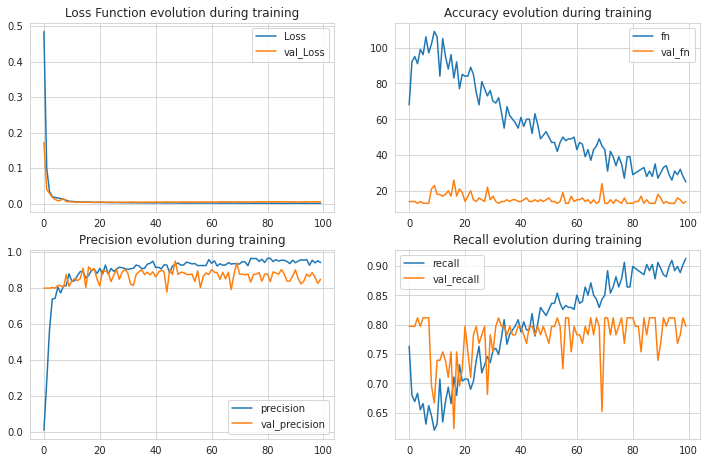

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.99      1.00       1.00          1.00
recall         1.00   0.93      1.00       0.96          1.00
f1-score       1.00   0.96      1.00       0.98          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [    21    266]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.87      1.00       0.94          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.84      1.00       0.92          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.98      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.91      1.00       0.95          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}
print(acc)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   227440.00 405.00      1.00  227845.00     227845.00
_______________________________________________
Confusion Matrix: 
 [[227440      0]
 [     0    405]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0     1  accuracy  macro avg  weighted avg
precision     1.00  0.93      1.00       0.96          1.00
recall        1.00  0.76      1.00       0.88          1.00
f1-score      1.00  0.84      1.00       0.92          1.00
support   56875.00 87.00      1.00   56962.00      56962.00
_______________________________________________
Confusion Matrix: 
 [[

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 65.7MB 70kB/s 


In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}
print(acc)

Learning rate set to 0.104628
0:	learn: 0.3509574	total: 113ms	remaining: 1m 52s
1:	learn: 0.1755122	total: 215ms	remaining: 1m 47s
2:	learn: 0.0930000	total: 319ms	remaining: 1m 46s
3:	learn: 0.0504270	total: 418ms	remaining: 1m 43s
4:	learn: 0.0292083	total: 522ms	remaining: 1m 43s
5:	learn: 0.0183316	total: 616ms	remaining: 1m 41s
6:	learn: 0.0123218	total: 710ms	remaining: 1m 40s
7:	learn: 0.0089961	total: 820ms	remaining: 1m 41s
8:	learn: 0.0069361	total: 919ms	remaining: 1m 41s
9:	learn: 0.0056386	total: 1.02s	remaining: 1m 40s
10:	learn: 0.0047512	total: 1.11s	remaining: 1m 40s
11:	learn: 0.0041375	total: 1.23s	remaining: 1m 40s
12:	learn: 0.0037103	total: 1.33s	remaining: 1m 40s
13:	learn: 0.0034145	total: 1.43s	remaining: 1m 40s
14:	learn: 0.0031869	total: 1.52s	remaining: 1m 40s
15:	learn: 0.0030178	total: 1.62s	remaining: 1m 39s
16:	learn: 0.0028884	total: 1.72s	remaining: 1m 39s
17:	learn: 0.0027759	total: 1.83s	remaining: 1m 39s
18:	learn: 0.0026894	total: 1.92s	remaining:

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.86%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.59      1.00       0.80          1.00
recall         1.00   0.69      1.00       0.84          1.00
f1-score       1.00   0.64      1.00       0.82          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159068    136]
 [    89    198]]

Test Result:
Accuracy Score: 99.75%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.35      1.00       0.67          1.00
recall        1.00   0.66      1.00       0.83          1.00
f1-score      1.00   0.46      1.00       0.73          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

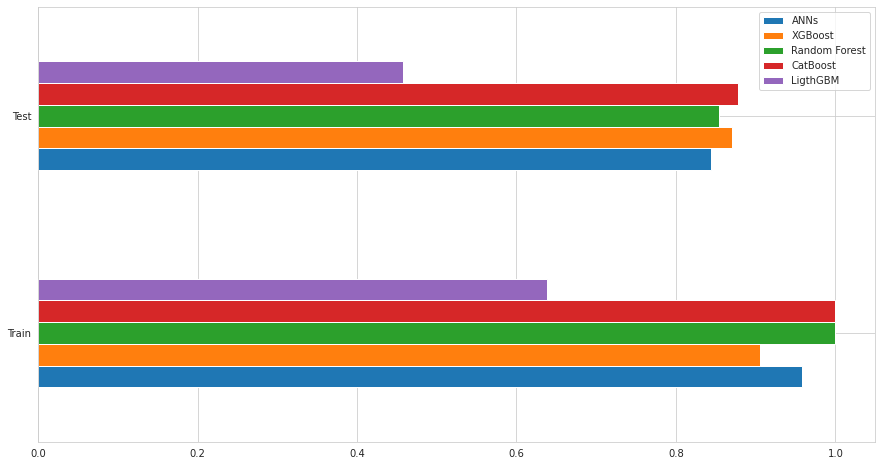

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

Auto-Encoder

In [ ]:
X = data.drop(['Class'], axis = 1) 
y = data["Class"] 
print('X: Features || y:Class Labels: \n')
print(X.shape,y.shape) 
# Converting to arrays   
X = X.values 
y = y.values 
# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) 
print('After Splitting : \n')
X_train.shape,X_test.shape,y_train.shape,y_test.shape

X: Features || y:Class Labels: 

(284807, 30) (284807,)
After Splitting : 



((227845, 30), (56962, 30), (227845,), (56962,))

Epoch 1/100
7121/7121 - 14s - loss: 0.0048 - val_loss: 0.0011
Epoch 2/100
7121/7121 - 12s - loss: 5.0383e-04 - val_loss: 6.0121e-04
Epoch 3/100
7121/7121 - 12s - loss: 3.6148e-04 - val_loss: 0.0013
Epoch 4/100
7121/7121 - 12s - loss: 3.2121e-04 - val_loss: 5.6240e-04
Epoch 5/100
7121/7121 - 12s - loss: 2.9609e-04 - val_loss: 3.4324e-04
Epoch 6/100
7121/7121 - 12s - loss: 2.8193e-04 - val_loss: 6.9291e-04
Epoch 7/100
7121/7121 - 12s - loss: 2.7035e-04 - val_loss: 6.3433e-04
Epoch 8/100
7121/7121 - 12s - loss: 2.6321e-04 - val_loss: 3.0013e-04
Epoch 9/100
7121/7121 - 12s - loss: 2.5491e-04 - val_loss: 0.0012
Epoch 10/100
7121/7121 - 12s - loss: 2.4724e-04 - val_loss: 2.7171e-04
Epoch 11/100
7121/7121 - 12s - loss: 2.4200e-04 - val_loss: 4.9683e-04
Epoch 12/100
7121/7121 - 12s - loss: 2.3497e-04 - val_loss: 7.9815e-04
Epoch 13/100
7121/7121 - 12s - loss: 2.3145e-04 - val_loss: 2.9001e-04
Epoch 14/100
7121/7121 - 12s - loss: 2.2526e-04 - val_loss: 6.3257e-04
Epoch 15/100
7121/7121 - 12s - 

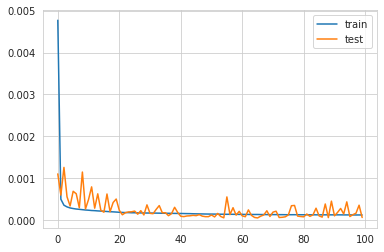

In [ ]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

Logistic Regression Comparison

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)

y_train_pred = model.predict(X_train_encode)
y_test_pred = model.predict(X_test_encode)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


'''print_score(y_train, yhat, train=True)
print_score(y_test, yhat, train=False)
scores_dict['LR_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\nAccuracy of LogisticRegression with Auto Encoder is:")
print(acc)

Train Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999262    0.861818  0.999096       0.930540       0.999017
recall          0.999833    0.585185  0.999096       0.792509       0.999096
f1-score        0.999547    0.697059  0.999096       0.848303       0.999010
support    227440.000000  405.000000  0.999096  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227402     38]
 [   168    237]]

Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999332   0.859649  0.999192      0.929491      0.999119
recall         0.999859   0.563218  0.999192      0.781539      0.999192
f1-score       0.999596   0.680556  0.999192      0.840076      0.999108
supp

In [ ]:
from lightgbm import LGBMClassifier
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

'''scores_dict['LigthGBM_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\nAccuracy of LGBMClassifier with Auto Encoder is:")
print(acc)

Train Result:
Accuracy Score: 99.88%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999222    0.708075  0.998811       0.853648       0.998705
recall          0.999587    0.562963  0.998811       0.781275       0.998811
f1-score        0.999404    0.627235  0.998811       0.813320       0.998743
support    227440.000000  405.000000  0.998811  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227346     94]
 [   177    228]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999209   0.575342  0.998666      0.787276      0.998562
recall         0.999455   0.482759  0.998666      0.741107      0.998666
f1-score       0.999332   0.525000  0.998666      0.762166      0.998607
supp

LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

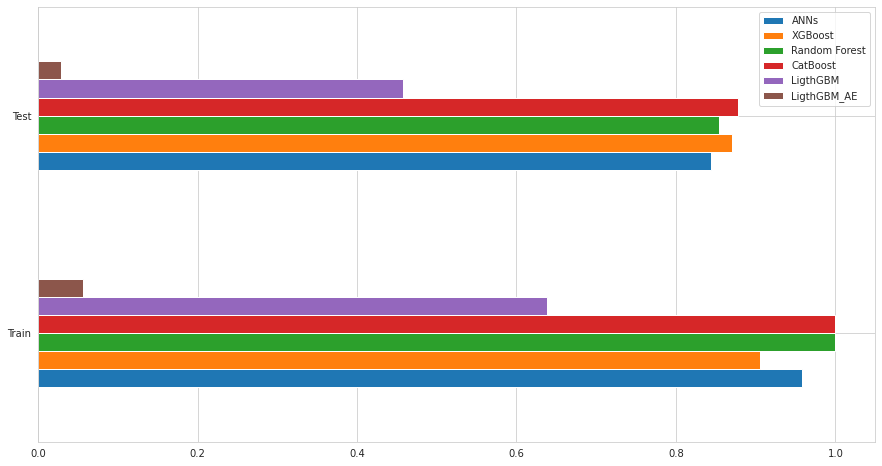

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

Epoch 1/50
7121/7121 - 14s - loss: 0.4395 - val_loss: 0.2391
Epoch 2/50
7121/7121 - 13s - loss: 0.3022 - val_loss: 0.1830
Epoch 3/50
7121/7121 - 12s - loss: 0.2608 - val_loss: 0.1556
Epoch 4/50
7121/7121 - 12s - loss: 0.2309 - val_loss: 0.1373
Epoch 5/50
7121/7121 - 12s - loss: 0.2067 - val_loss: 0.1198
Epoch 6/50
7121/7121 - 12s - loss: 0.1910 - val_loss: 0.1172
Epoch 7/50
7121/7121 - 12s - loss: 0.1809 - val_loss: 0.1131
Epoch 8/50
7121/7121 - 12s - loss: 0.1736 - val_loss: 0.1009
Epoch 9/50
7121/7121 - 12s - loss: 0.1664 - val_loss: 0.1067
Epoch 10/50
7121/7121 - 12s - loss: 0.1620 - val_loss: 0.1034
Epoch 11/50
7121/7121 - 13s - loss: 0.1574 - val_loss: 0.0996
Epoch 12/50
7121/7121 - 13s - loss: 0.1536 - val_loss: 0.0950
Epoch 13/50
7121/7121 - 12s - loss: 0.1507 - val_loss: 0.0986
Epoch 14/50
7121/7121 - 12s - loss: 0.1477 - val_loss: 0.0938
Epoch 15/50
7121/7121 - 12s - loss: 0.1459 - val_loss: 0.0936
Epoch 16/50
7121/7121 - 12s - loss: 0.1434 - val_loss: 0.0937
Epoch 17/50
7121/

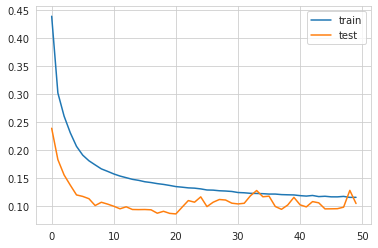

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_8 (Batch (None, 30)                120       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30)                120       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 30)                0   

In [ ]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress2.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress2.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder2.h5')
model.summary()

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['LR_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\nOverall accuracy of the LogisticRegression:\n")
print(acc)

Train Result:
Accuracy Score: 99.88%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999222    0.708075  0.998811       0.853648       0.998705
recall          0.999587    0.562963  0.998811       0.781275       0.998811
f1-score        0.999404    0.627235  0.998811       0.813320       0.998743
support    227440.000000  405.000000  0.998811  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227346     94]
 [   177    228]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999209   0.575342  0.998666      0.787276      0.998562
recall         0.999455   0.482759  0.998666      0.741107      0.998666
f1-score       0.999332   0.525000  0.998666      0.762166      0.998607
supp

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LGBMClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['LG_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\nOverall accuracy of the LGBMClassifier:\n")
print(acc)

Train Result:
Accuracy Score: 99.88%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999222    0.708075  0.998811       0.853648       0.998705
recall          0.999587    0.562963  0.998811       0.781275       0.998811
f1-score        0.999404    0.627235  0.998811       0.813320       0.998743
support    227440.000000  405.000000  0.998811  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227346     94]
 [   177    228]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999209   0.575342  0.998666      0.787276      0.998562
recall         0.999455   0.482759  0.998666      0.741107      0.998666
f1-score       0.999332   0.525000  0.998666      0.762166      0.998607
supp

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LGBMClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['LG_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print(acc)

Train Result:
Accuracy Score: 99.88%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999222    0.708075  0.998811       0.853648       0.998705
recall          0.999587    0.562963  0.998811       0.781275       0.998811
f1-score        0.999404    0.627235  0.998811       0.813320       0.998743
support    227440.000000  405.000000  0.998811  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227346     94]
 [   177    228]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999209   0.575342  0.998666      0.787276      0.998562
recall         0.999455   0.482759  0.998666      0.741107      0.998666
f1-score       0.999332   0.525000  0.998666      0.762166      0.998607
supp

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 65.7MB 53kB/s 


In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = CatBoostClassifier()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['LG_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\n The accuracy of the RandomForestClassifier model with auto encoder is: ")
print(acc)

Learning rate set to 0.104628
0:	learn: 0.3997636	total: 90.2ms	remaining: 1m 30s
1:	learn: 0.2073395	total: 176ms	remaining: 1m 27s
2:	learn: 0.1106424	total: 267ms	remaining: 1m 28s
3:	learn: 0.0639855	total: 352ms	remaining: 1m 27s
4:	learn: 0.0378894	total: 460ms	remaining: 1m 31s
5:	learn: 0.0240136	total: 545ms	remaining: 1m 30s
6:	learn: 0.0162750	total: 632ms	remaining: 1m 29s
7:	learn: 0.0118291	total: 713ms	remaining: 1m 28s
8:	learn: 0.0090451	total: 805ms	remaining: 1m 28s
9:	learn: 0.0072899	total: 890ms	remaining: 1m 28s
10:	learn: 0.0061274	total: 977ms	remaining: 1m 27s
11:	learn: 0.0053849	total: 1.06s	remaining: 1m 27s
12:	learn: 0.0047917	total: 1.15s	remaining: 1m 27s
13:	learn: 0.0044229	total: 1.23s	remaining: 1m 26s
14:	learn: 0.0040993	total: 1.33s	remaining: 1m 27s
15:	learn: 0.0038999	total: 1.42s	remaining: 1m 27s
16:	learn: 0.0037516	total: 1.5s	remaining: 1m 27s
17:	learn: 0.0036153	total: 1.59s	remaining: 1m 27s
18:	learn: 0.0035012	total: 1.68s	remaining:

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = RandomForestClassifier(n_estimators=100, oob_score=False)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['RF_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\n The accuracy of the RandomForestClassifier model with auto encoder is: ")
print(acc)

Train Result:
Accuracy Score: 99.88%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999222    0.708075  0.998811       0.853648       0.998705
recall          0.999587    0.562963  0.998811       0.781275       0.998811
f1-score        0.999404    0.627235  0.998811       0.813320       0.998743
support    227440.000000  405.000000  0.998811  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227346     94]
 [   177    228]]

Test Result:
Accuracy Score: 99.87%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999209   0.575342  0.998666      0.787276      0.998562
recall         0.999455   0.482759  0.998666      0.741107      0.998666
f1-score       0.999332   0.525000  0.998666      0.762166      0.998607
supp

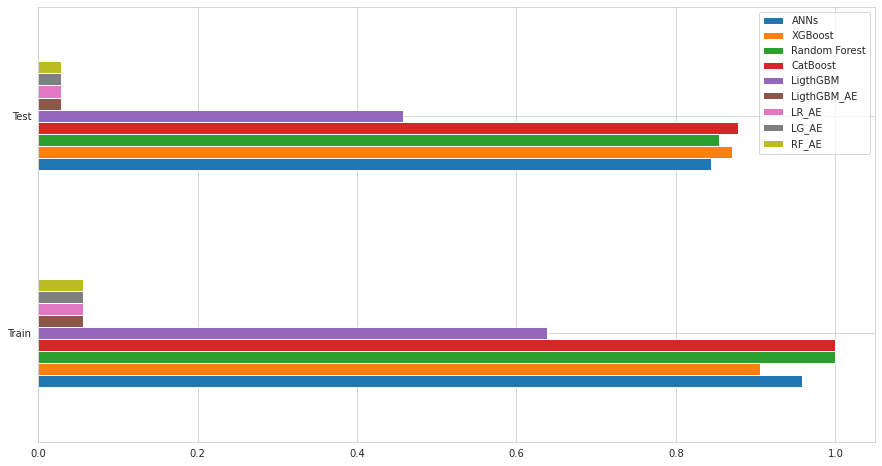

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               7936      
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               6

In [ ]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=100, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
112/112 [==============================] - 14s 106ms/step - loss: 0.5884 - fn: 46.9912 - fp: 24569.0796 - tn: 91916.6814 - tp: 158.0265 - precision: 0.0058 - recall: 0.7638 - val_loss: 0.0771 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 2/100
112/112 [==============================] - 11s 100ms/step - loss: 0.0644 - fn: 64.0531 - fp: 167.9115 - tn: 116323.5575 - tp: 135.2566 - precision: 0.4226 - recall: 0.6857 - val_loss: 0.0193 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 3/100
112/112 [==============================] - 11s 101ms/step - loss: 0.0212 - fn: 70.2832 - fp: 64.7788 - tn: 116412.8319 - tp: 142.8850 - precision: 0.6534 - recall: 0.6644 - val_loss: 0.0132 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 4/100
112/112 [==========

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0051 - fn: 21.0000 - fp: 5.0000 - tn: 56870.0000 - tp: 66.0000 - precision: 0.9296 - recall: 0.7586
[0.0050909374840557575, 21.0, 5.0, 56870.0, 66.0, 0.9295774698257446, 0.7586206793785095]


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

'''scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}'''


Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999938    0.984887  0.999912       0.992413       0.999912
recall          0.999974    0.965432  0.999912       0.982703       0.999912
f1-score        0.999956    0.975062  0.999912       0.987509       0.999912
support    227440.000000  405.000000  0.999912  227845.000000  227845.000000
_______________________________________________
Confusion Matrix: 
 [[227434      6]
 [    14    391]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0          1  accuracy     macro avg  weighted avg
precision      0.999631   0.929577  0.999544      0.964604      0.999524
recall         0.999912   0.758621  0.999544      0.879266      0.999544
f1-score       0.999771   0.835443  0.999544      0.917607      0.999520
supp

"scores_dict = {\n    'ANNs': {\n        'Train': f1_score(y_train, y_train_pred.round()),\n        'Test': f1_score(y_test, y_test_pred.round()),\n    },\n}"

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# scale data
t = StandardScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder2.h5')
#model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = RandomForestClassifier(n_estimators=100, oob_score=False)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
'''scores_dict['RF_AE'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}'''
print("\n The accuracy of the RandomForestClassifier model with auto encoder is: ")
print(acc)